[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ds-reboot/python-first-part/blob/main/notebooks/hometasks/Task2_dmrf_visual.ipynb)

# Задание
* Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"
* Cохранить результаты в pandas dataframe
<hr>

* Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных:
-- Привести колонки датафрейма к одному типу данных
-- Проверить индекс, чтобы он соответствовал порядку строк
-- Проверить наличие пропусков и в случае обнаружения, определить стратегию их обработки
<hr>

* Провести мини-исследование рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.
-- Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены.
-- Рассчитать объемы вводимого жилья по регионам и по годам.
-- Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах
-- Визуализировать разброс, связь и распределение этих показателей по регионам
-- Сделать выводы по каждому из расчетов и графиков



In [61]:
import requests
import os
import csv
import pandas as pd
from tqdm.auto import tqdm
from bs4 import BeautifulSoup as bs
from urllib.parse import urljoin, urlparse
import datetime
from datetime import datetime, date
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

In [2]:
# установим параметры экрана
# pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)

## Список объектов

In [3]:
# offset_ = 1
# limit_ = 1000
# url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={offset_}&limit={limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
# res = requests.get(url)
# objects_data = res.json()

In [4]:
# загрузим датасет из ДЗ1
df = pd.read_csv('nash-dom-rf.csv')
df.head(5)

,objId,developer,rpdRegionCd,objAddr,objElemLivingCnt,objReady100PercDt,objSquareLiving,objCompensFundFlg,objProblemFlg,latitude,longitude,problemFlag,siteStatus,objGuarantyEscrowFlg,residentialBuildings,rpdNum,pdId,buildType,objStatus,objFloorMin,objFloorMax,objCommercNm,complexShortName
0,29679,212-2,61,г Таганрог,18,2020-03-31,1519.00,0,0,47.2238,38.8513,NONE,Строящиеся,0,1,61-000818,124647,Жилое,0,NaN,NaN,NaN,NaN
1,13383,2МЕН ГРУПП,72,г Тюмень,68,2022-12-31,6293.78,1,0,57.1519,65.5536,NONE,Строящиеся,0,1,72-000095,28105,Жилое,0,4.0,20.0,NaN,NaN
2,13397,2МЕН ГРУПП,72,"г Тюмень, ул Профсоюзная, д. 56",65,2024-12-31,6248.51,0,0,57.1519,65.5544,NONE,Строящиеся,0,1,72-000097,28141,Жилое,0,6.0,12.0,NaN,NaN
3,13399,2МЕН ГРУПП,72,"г Тюмень, ул Профсоюзная, д. 56",0,2024-12-31,0.00,0,0,57.1519,65.5544,NONE,Строящиеся,0,0,72-000097,28141,Нежилое,0,1.0,1.0,NaN,NaN
4,13398,2МЕН ГРУПП,72,"г Тюмень, ул Профсоюзная, д. 56",43,2024-12-31,4812.98,0,0,57.1519,65.5544,NONE,Строящиеся,0,1,72-000097,28141,Жилое,0,7.0,10.0,NaN,NaN


# Данные по определенному объекту

In [5]:
# url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/36774'

In [6]:
# загрузим датасет из ДЗ1
df2 = pd.read_csv('nash-dom-rf1.csv')
df2.head(5)

,id,pdId,region,address,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,objLkFinishTypeDesc,objLkFreePlanDesc,objElemParkingCnt,objSquareLiving,rpdNum,rpdPdfLink,rpdIssueDttm,objLkLatitude,objLkLongitude,objCompensFundFlg,objProblemFlg,objLkClassDesc,loadDttm,photoRenderDTO,objGuarantyEscrowFlg,objectType,residentialBuildings,newBuildingId,objFlatCnt,objFlatSq,objNonlivElemCnt,objStatus,isAvailableWantLiveHere,objInfrstrBicycleLaneFlg,objInfrstrRampFlg,objInfrstrCurbLoweringFlg,objectTransportInfo,conclusion,objGreenHouseFlg,objEnergyEffShortDesc,infrastructureIndexValue,developer.devId,developer.devShortCleanNm,developer.devShortNm,developer.devFullCleanNm,developer.problObjCnt,developer.buildObjCnt,developer.comissObjCnt,developer.regRegionDesc,developer.devPhoneNum,developer.devSite,developer.devEmail,developer.devInn,developer.devOgrn,developer.devKpp,developer.devLegalAddr,developer.devFactAddr,developer.lastRpdId,developer.fundGuarantyFlg,developer.devOrgRegRegionCd,developer.devEmplMainFullNm,developer.orgForm.id,developer.orgForm.fullForm,developer.orgForm.shortForm,developer.objGuarantyEscrowFlg,developer.govFundFlg,floorMin,floorMax,miniUrl,objFloorCnt,objTransferPlanDt,objLivCeilingHeight,objInfrstrPlaygrndCnt,objInfrstrSportGroundCnt,objInfrstrTrashAreaCnt,objInfrstrObjPrkngCnt,objInfrstrNotObjPrkngCnt,objElevatorWheelchairCnt,objElevatorPassengerCnt,objElevatorCargoCnt,soldOutPerc,objPriceAvg,generalContractorNm,nonlivFirstFloor,objLkSaleDepEmail,developer.developerGroupName,developer.companyGroupId,quartography.objLivElem1KCnt,quartography.objLivElem2KCnt,quartography.objLivElem3KCnt,quartography.objLivElem4KCnt,quartography.objLivElemCnt,quartography.objLivElemEntrCnt,quartography.objLivElemEntrFloorAvg,transportDistIndex,transportDistIndexValue,nameObj,greenAreaIndexValue,airQualityIndexValue,complexShortNm,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm,metro.id,metro.name,metro.line,metro.color,metro.time,metro.isWalk,metro.colors
0,29679,124647,61,г Таганрог,18,2020-03-31,Другое,Под ключ,Есть,0,1519.00,61-000818,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,20-03-2019 18:41,47.2238,38.8513,0,0,Комфорт,13-09-2022 01:29,[],0,normal,1,40800,18,1519.00,0,0,True,0,0,0,[],False,0,Не нормируется,7.0,7424,212-2,212-2,212-2,0,1,0,Ростовская область,+7(961)285-90-10,taganrogjsk.wixsite.com,kirpol76@gmail.com,6154572922,1116154005923,615401001,"Ростовская область, город Таганрог, улица Своб...",обл Ростовская город Таганрог улица Сергея Шил...,126093.0,0,61.0,Снимщикова Ольга Викторовна,20,Жилищный или жилищно-строительный кооператив,ЖСК,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13383,28105,72,г Тюмень,68,2022-12-31,Другое,По желанию заказчика,Есть,31,6293.78,72-000095,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,07-09-2022 15:16,57.1519,65.5536,1,0,Элитный,13-09-2022 01:29,"[{'objId': 13383, 'pdId': 28105, 'rpdId': 6269...",0,normal,1,39024,68,6293.78,10,0,True,0,1,1,[],False,0,B,10.0,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,Тюменская область,+7(345)279-18-88,2mengroup.ru,info@2mengroup.ru,7701651356,1067746424899,720301001,"Тюменская область, город Тюмень, улица Комсомо...","Тюменская область, город Тюмень, улица Комсомо...",632865.0,1,72.0,Киселев Сергей Михайлович,1,Акционерное общество,АО,0,0,4.0,20.0,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,20.0,28-02-2023 12:00,"2,8",1.0,1.0,1.0,0.0,11.0,0.0,5.0,1.0,0.407164,53109.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),1.0,info@2mengroup.ru,2МЕН ГРУПП ДЕВЕЛОПМЕНТ,5776.0,13.0,21.0,34.0,0.0,68.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13397,28141,72,"г Тюмень, ул Профсоюзная, д. 56",65,2024-12-31,Другое,Без отделки,Нет,0,6248.51,72-000097,https://xn--80az8a.xn--d1aq

Text(0.5, 1.0, 'Пропущенные значения')

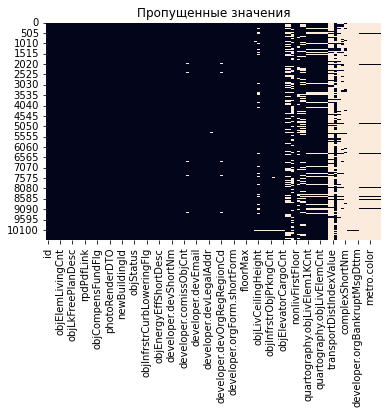

In [63]:
# строим график пропущенных значений
sns.heatmap(df2.isnull(), cbar = False).set_title("Пропущенные значения")

In [7]:
# выберем необходимые столбцы
df3 = df2[['id', 'developer.devShortCleanNm', 'region', 'developer.regRegionDesc', 'address', 'objLkClassDesc',
     'wallMaterialShortDesc', 'objLkFinishTypeDesc', 'objReady100PercDt', 'soldOutPerc', 'objElemParkingCnt',
     'objElemLivingCnt', 'objSquareLiving',  'floorMax', 'objPriceAvg']]
df3

,id,developer.devShortCleanNm,region,developer.regRegionDesc,address,objLkClassDesc,wallMaterialShortDesc,objLkFinishTypeDesc,objReady100PercDt,soldOutPerc,objElemParkingCnt,objElemLivingCnt,objSquareLiving,floorMax,objPriceAvg
0,29679,212-2,61,Ростовская область,г Таганрог,Комфорт,Другое,Под ключ,2020-03-31,NaN,0,18,1519.00,NaN,NaN
1,13383,2МЕН ГРУПП,72,Тюменская область,г Тюмень,Элитный,Другое,По желанию заказчика,2022-12-31,0.407164,31,68,6293.78,20.0,53109.0
2,13397,2МЕН ГРУПП,72,Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",Элитный,Другое,Без отделки,2024-12-31,0.999984,0,65,6248.51,12.0,45523.0
3,13399,2МЕН ГРУПП,72,Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",Элитный,Другое,Без отделки,2024-12-31,0.917243,125,0,0.00,1.0,50768.0
4,13398,2МЕН ГРУПП,72,Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",Элитный,Другое,Без отделки,2024-12-31,1.000000,0,43,4812.98,10.0,47886.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10587,28072,ЯРКИЙ МИР,50,Московская область,"г Котельники, район мкр.Ковровый, д.1-5, 24-29...",Типовой,Другое,Под ключ,2024-06-30,0.073569,0,312,14788.80,26.0,85610.0
10588,28071,ЯРКИЙ МИР,50,Московская область,"г Котельники, район мкр.Ковровый, д.1-5, 24-29...",Типовой,Другое,Под ключ,2024-06-30,0.071155,0,288,14870.40,26.0,85604.0
10589,28073,ЯРКИЙ МИР,50,Московская область,"г Котельники, район мкр.Ковровый, д.1-5, 24-29...",Типовой,Другое,Под ключ,2024-06-30,0.070834,0,312,14872.80,26.0,85634.0
10590,44447,ЯРОСЛАВЛЬЗАКАЗЧИК,76,Ярославская область,"г Ярославль, Фрунзенский район, территория в р...",Типовой,Кирпич,Другое,2022-12-31,0.241243,0,127,6764.22,6.0,69916.0


In [8]:
# меняем имена столбцов
df3.rename(columns = {'id': 'id дома', 'developer.devShortCleanNm': 'застройщик', 'region': 'номер региона',
                      'developer.regRegionDesc': 'название региона', 'address': 'адрес дома',
                      'objLkClassDesc': 'класс недвижимости', 'wallMaterialShortDesc': 'материал стен',
                      'objLkFinishTypeDesc': 'тип отделки', 'objReady100PercDt': 'ввод в эксплуатацию',
                      'soldOutPerc': 'распроданность квартир', 'objElemParkingCnt':'количество мест в паркинге',
                       'objElemLivingCnt': 'количество квартир', 'objSquareLiving': 'жилая площадь', 
                      'floorMax': 'количество этажей', 'objPriceAvg': 'средняя цена за 1 м²'}, inplace=True)
df3

,id дома,застройщик,номер региона,название региона,адрес дома,класс недвижимости,материал стен,тип отделки,ввод в эксплуатацию,распроданность квартир,количество мест в паркинге,количество квартир,жилая площадь,количество этажей,средняя цена за 1 м²
0,29679,212-2,61,Ростовская область,г Таганрог,Комфорт,Другое,Под ключ,2020-03-31,NaN,0,18,1519.00,NaN,NaN
1,13383,2МЕН ГРУПП,72,Тюменская область,г Тюмень,Элитный,Другое,По желанию заказчика,2022-12-31,0.407164,31,68,6293.78,20.0,53109.0
2,13397,2МЕН ГРУПП,72,Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",Элитный,Другое,Без отделки,2024-12-31,0.999984,0,65,6248.51,12.0,45523.0
3,13399,2МЕН ГРУПП,72,Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",Элитный,Другое,Без отделки,2024-12-31,0.917243,125,0,0.00,1.0,50768.0
4,13398,2МЕН ГРУПП,72,Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",Элитный,Другое,Без отделки,2024-12-31,1.000000,0,43,4812.98,10.0,47886.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10587,28072,ЯРКИЙ МИР,50,Московская область,"г Котельники, район мкр.Ковровый, д.1-5, 24-29...",Типовой,Другое,Под ключ,2024-06-30,0.073569,0,312,14788.80,26.0,85610.0
10588,28071,ЯРКИЙ МИР,50,Московская область,"г Котельники, район мкр.Ковровый, д.1-5, 24-29...",Типовой,Другое,Под ключ,2024-06-30,0.071155,0,288,14870.40,26.0,85604.0
10589,28073,ЯРКИЙ МИР,50,Московская область,"г Котельники, район мкр.Ковровый, д.1-5, 24-29...",Типовой,Другое,Под ключ,2024-06-30,0.070834,0,312,14872.80,26.0,85634.0
10590,44447,ЯРОСЛАВЛЬЗАКАЗЧИК,76,Ярославская область,"г Ярославль, Фрунзенский район, территория в р...",Типовой,Кирпич,Другое,2022-12-31,0.241243,0,127,6764.22,6.0,69916.0


In [9]:
# смотрим инфу по датасету
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10592 entries, 0 to 10591
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id дома                     10592 non-null  int64  
 1   застройщик                  10592 non-null  object 
 2   номер региона               10592 non-null  int64  
 3   название региона            10459 non-null  object 
 4   адрес дома                  10566 non-null  object 
 5   класс недвижимости          10592 non-null  object 
 6   материал стен               10592 non-null  object 
 7   тип отделки                 10592 non-null  object 
 8   ввод в эксплуатацию         10592 non-null  object 
 9   распроданность квартир      7707 non-null   float64
 10  количество мест в паркинге  10592 non-null  int64  
 11  количество квартир          10592 non-null  int64  
 12  жилая площадь               10592 non-null  float64
 13  количество этажей           105

In [10]:
# описательная характеристика датасета
df3.describe(include = "all")

,id дома,застройщик,номер региона,название региона,адрес дома,класс недвижимости,материал стен,тип отделки,ввод в эксплуатацию,распроданность квартир,количество мест в паркинге,количество квартир,жилая площадь,количество этажей,средняя цена за 1 м²
count,10592.000000,10592,10592.000000,10459,10566,10592,10592,10592,10592,7.707000e+03,10592.000000,10592.000000,10592.000000,10591.000000,7.702000e+03
unique,NaN,3587,NaN,81,8445,5,6,5,58,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,СЗ ГЕЛЕОН СТРОЙ,NaN,Москва город,г Санкт-Петербург,Комфорт,Монолит-кирпич,Без отделки,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,148,NaN,1093,98,5339,5500,5226,1985,NaN,NaN,NaN,NaN,NaN,NaN
mean,38457.713085,NaN,48.518788,NaN,NaN,NaN,NaN,NaN,NaN,4.649594e-01,36.626511,190.775963,9463.424954,12.522236,1.133708e+05
std,9883.265776,NaN,23.241748,NaN,NaN,NaN,NaN,NaN,NaN,3.478007e-01,116.158713,237.093904,11430.693076,8.422700,1.124996e+05
min,1259.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,7.770370e-07,0.000000,0.000000,0.000000,0.000000,1.000000e+03
25%,36145.750000,NaN,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.224281e-01,0.000000,40.000000,2112.285000,5.000000,6.306450e+04
50%,41723.500000,NaN,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.339038e-01,0.000000,125.000000,6482.510000,11.000000,8.736500e+04
75%,45099.250000,NaN,71.000000,NaN,NaN,NaN,NaN,NaN,NaN,7.854767e-01,0.000000,254.000000,12500.112500,18.000000,1.291055e+05


In [11]:
# смотрим уникальность колонок
df3.nunique()

id дома                       10586
застройщик                     3587
номер региона                    80
название региона                 81
адрес дома                     8445
класс недвижимости                5
материал стен                     6
тип отделки                       5
ввод в эксплуатацию              58
распроданность квартир         6957
количество мест в паркинге      514
количество квартир              953
жилая площадь                  7624
количество этажей                62
средняя цена за 1 м²           7055
dtype: int64

In [12]:
#  считаем количестово пропущенных значений
df3.isna().sum()

id дома                          0
застройщик                       0
номер региона                    0
название региона               133
адрес дома                      26
класс недвижимости               0
материал стен                    0
тип отделки                      0
ввод в эксплуатацию              0
распроданность квартир        2885
количество мест в паркинге       0
количество квартир               0
жилая площадь                    0
количество этажей                1
средняя цена за 1 м²          2890
dtype: int64

In [13]:
# количество столбцов, которые имеют хотя бы одно пропущенное значение
len(df3.columns[df3.isna().any()].tolist())

5

In [14]:
# изменяем форман с object на datetime
df3['ввод в эксплуатацию'] = pd.to_datetime(df3['ввод в эксплуатацию'], dayfirst=True)

In [23]:
# выбираем дома где 'количество мест в паркинге' / 'распроданность квартир'  NaN и устанавливаем 0 
sktb['количество мест в паркинге'].fillna(0, inplace = True)
sktb['распроданность квартир'].fillna(0, inplace = True)

In [15]:
# смотрим инфу по датасету
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10592 entries, 0 to 10591
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id дома                     10592 non-null  int64         
 1   застройщик                  10592 non-null  object        
 2   номер региона               10592 non-null  int64         
 3   название региона            10459 non-null  object        
 4   адрес дома                  10566 non-null  object        
 5   класс недвижимости          10592 non-null  object        
 6   материал стен               10592 non-null  object        
 7   тип отделки                 10592 non-null  object        
 8   ввод в эксплуатацию         10592 non-null  datetime64[ns]
 9   распроданность квартир      7707 non-null   float64       
 10  количество мест в паркинге  10592 non-null  int64         
 11  количество квартир          10592 non-null  int64     

In [16]:
df3

,id дома,застройщик,номер региона,название региона,адрес дома,класс недвижимости,материал стен,тип отделки,ввод в эксплуатацию,распроданность квартир,количество мест в паркинге,количество квартир,жилая площадь,количество этажей,средняя цена за 1 м²
0,29679,212-2,61,Ростовская область,г Таганрог,Комфорт,Другое,Под ключ,2020-03-31,NaN,0,18,1519.00,NaN,NaN
1,13383,2МЕН ГРУПП,72,Тюменская область,г Тюмень,Элитный,Другое,По желанию заказчика,2022-12-31,0.407164,31,68,6293.78,20.0,53109.0
2,13397,2МЕН ГРУПП,72,Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",Элитный,Другое,Без отделки,2024-12-31,0.999984,0,65,6248.51,12.0,45523.0
3,13399,2МЕН ГРУПП,72,Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",Элитный,Другое,Без отделки,2024-12-31,0.917243,125,0,0.00,1.0,50768.0
4,13398,2МЕН ГРУПП,72,Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",Элитный,Другое,Без отделки,2024-12-31,1.000000,0,43,4812.98,10.0,47886.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10587,28072,ЯРКИЙ МИР,50,Московская область,"г Котельники, район мкр.Ковровый, д.1-5, 24-29...",Типовой,Другое,Под ключ,2024-06-30,0.073569,0,312,14788.80,26.0,85610.0
10588,28071,ЯРКИЙ МИР,50,Московская область,"г Котельники, район мкр.Ковровый, д.1-5, 24-29...",Типовой,Другое,Под ключ,2024-06-30,0.071155,0,288,14870.40,26.0,85604.0
10589,28073,ЯРКИЙ МИР,50,Московская область,"г Котельники, район мкр.Ковровый, д.1-5, 24-29...",Типовой,Другое,Под ключ,2024-06-30,0.070834,0,312,14872.80,26.0,85634.0
10590,44447,ЯРОСЛАВЛЬЗАКАЗЧИК,76,Ярославская область,"г Ярославль, Фрунзенский район, территория в р...",Типовой,Кирпич,Другое,2022-12-31,0.241243,0,127,6764.22,6.0,69916.0


In [17]:
df3.describe()

,id дома,номер региона,распроданность квартир,количество мест в паркинге,количество квартир,жилая площадь,количество этажей,средняя цена за 1 м²
count,10592.000000,10592.000000,7.707000e+03,10592.000000,10592.000000,10592.000000,10591.000000,7.702000e+03
mean,38457.713085,48.518788,4.649594e-01,36.626511,190.775963,9463.424954,12.522236,1.133708e+05
std,9883.265776,23.241748,3.478007e-01,116.158713,237.093904,11430.693076,8.422700,1.124996e+05
min,1259.000000,1.000000,7.770370e-07,0.000000,0.000000,0.000000,0.000000,1.000000e+03
25%,36145.750000,26.000000,1.224281e-01,0.000000,40.000000,2112.285000,5.000000,6.306450e+04
50%,41723.500000,50.000000,4.339038e-01,0.000000,125.000000,6482.510000,11.000000,8.736500e+04
75%,45099.250000,71.000000,7.854767e-01,0.000000,254.000000,12500.112500,18.000000,1.291055e+05
max,47965.000000,92.000000,1.000000e+00,3580.000000,2676.000000,142978.700000,76.000000,2.583664e+06


In [18]:
# Провести мини-исследование рынка строящейся недвижимости в одном или нескольких регионах
# с помощью pandas, matplotlib, seaborn, plotly и других инструментов.

In [19]:
# выберем Смоленскую, Калужскую, Тверьскую и Брянскую области
sktb = df3.loc[(df3['номер региона'] == 67) | (df3['номер региона'] == 40) | 
                (df3['номер региона'] == 69) | (df3['номер региона'] == 32)]
sktb = sktb.reset_index()
sktb = sktb.drop(['index'],axis=1)
sktb

,id дома,застройщик,номер региона,название региона,адрес дома,класс недвижимости,материал стен,тип отделки,ввод в эксплуатацию,распроданность квартир,количество мест в паркинге,количество квартир,жилая площадь,количество этажей,средняя цена за 1 м²
0,41000,ГК ЖБИ-2,69,Тверская область,"г Тверь, переулок 1-ый Вагонников, д. 6",Комфорт,Кирпич,Без отделки,2023-06-30,0.020472,0,55,3111.50,8.0,47400.0
1,40008,ГК ЖБИ-2,69,Тверская область,"г Тверь, переулок 1-ый Вагонников, д. 6",Комфорт,Кирпич,Без отделки,2023-06-30,1.000000,0,79,4765.50,11.0,38946.0
2,5120,ЖИРАФ И К,69,Тверская область,"г Тверь, улица Терещенко, д. 6, корпус 4",Типовой,Другое,По желанию заказчика,2022-09-30,1.000000,0,79,4097.10,16.0,41180.0
3,46139,ИСК ФИНАНСИНВЕСТ,69,Москва город,"г Тверь, ул Складская, д. 164",Комфорт,Монолит-кирпич,Без отделки,2024-03-31,0.026067,0,309,14951.36,25.0,108609.0
4,40676,ИСК ФИНАНСИНВЕСТ,69,Москва город,г Тверь,Типовой,Монолит-кирпич,Без отделки,2023-09-30,0.688313,0,231,14082.92,23.0,68428.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,34611,УНИМАРКЕТ,40,Калужская область,"г Калуга, улица Кутузова, д. 14 16",Комфорт,Кирпич,Без отделки,2022-12-31,0.890705,0,12,979.00,6.0,57912.0
278,42543,ФОНД ПОДДЕРЖКИ СТРОИТЕЛЬСТВА ДОСТУПНОГО ЖИЛЬЯ ...,40,Калужская область,"п Воротынск, ул Сиреневый Бульвар, д. 8, строе...",Типовой,Другое,Без отделки,2022-12-31,0.072988,0,60,3148.20,6.0,32661.0
279,37771,ЦЕНТРСТРОЙ,69,Тверская область,"г Тверь, ул Гончаровой, д. 34",Комфорт,Кирпич,Без отделки,2023-06-30,0.981185,0,94,4283.80,9.0,60133.0
280,37772,ЦЕНТРСТРОЙ,69,Тверская область,"г Тверь, ул Гончаровой, д. 34",Комфорт,Кирпич,Без отделки,2023-06-30,NaN,0,0,0.00,1.0,NaN


In [20]:
sktb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id дома                     282 non-null    int64         
 1   застройщик                  282 non-null    object        
 2   номер региона               282 non-null    int64         
 3   название региона            282 non-null    object        
 4   адрес дома                  282 non-null    object        
 5   класс недвижимости          282 non-null    object        
 6   материал стен               282 non-null    object        
 7   тип отделки                 282 non-null    object        
 8   ввод в эксплуатацию         282 non-null    datetime64[ns]
 9   распроданность квартир      216 non-null    float64       
 10  количество мест в паркинге  282 non-null    int64         
 11  количество квартир          282 non-null    int64         

Text(0.5, 1.0, 'Пропущенные значения')

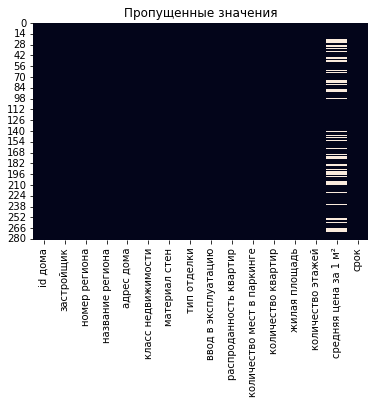

In [62]:
# строим график пропущенных значений
sns.heatmap(sktb.isnull(), cbar = False).set_title("Пропущенные значения")

In [22]:
# нестыковка (неместные застройщики в сторонних регионах)
sktb.groupby('номер региона')[['название региона']].value_counts()

номер региона  название региона    
32             Брянская область        60
               Москва город             2
40             Калужская область       36
               Московская область      24
               Смоленская область       9
               Москва город             3
               Брянская область         1
67             Смоленская область      60
               Московская область       2
               Свердловская область     1
69             Тверская область        71
               Москва город             6
               Московская область       5
               Рязанская область        2
dtype: int64

In [58]:
# количество строящихся домов по регионам
g1 =sktb['номер региона'].value_counts()
g1

69    84
40    73
67    63
32    62
Name: номер региона, dtype: int64

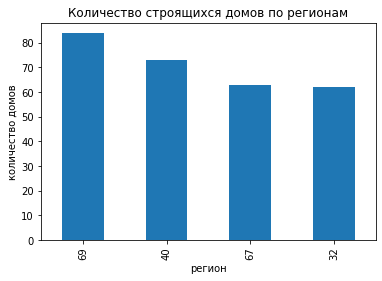

In [60]:
g1.plot(kind='bar')
plt.xlabel('регион')
plt.ylabel('количество домов')
plt.title("Количество строящихся домов по регионам")
plt.show()

In [64]:
# Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены.
# Любые значения NaN автоматически пропускаются (не трогаем).
g2 = sktb.groupby('номер региона')['средняя цена за 1 м²'].agg(['min', 'max', 'mean']).sort_values('mean')
g2

,min,max,mean
номер региона,,,
67,15337.0,83941.0,51771.250000
32,20306.0,81096.0,57713.739130
69,15000.0,117410.0,67183.745455
40,25897.0,168944.0,78270.966102


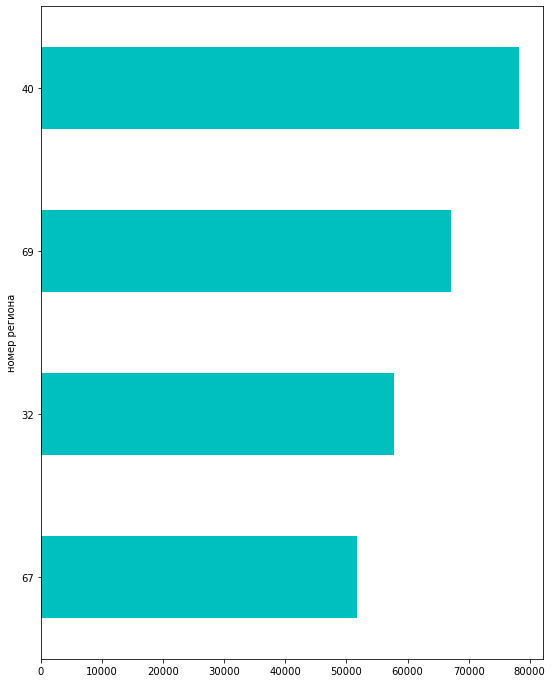

In [100]:
g2['mean'].plot(kind='barh', color='c')
plt.show()

In [26]:
# Вывод: самые дорогие квартиры в Калужской области, самые дешевые в Смоленской области

In [34]:
# Рассчитать объемы вводимого жилья по регионам и по годам.
g = (sktb.groupby(sktb['номер региона'])[['жилая площадь']].sum()).sort_values('жилая площадь')
g

,жилая площадь
номер региона,
67,315586.88
40,462279.58
69,473105.43
32,488846.73


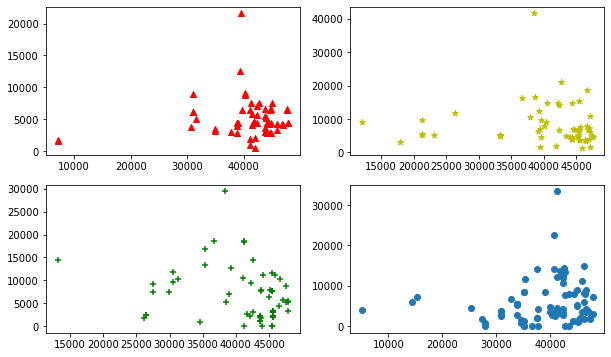

In [99]:
# sktb['средняя цена за 1 м²'].fillna(0, inplace = True)
fig, ax = plt.subplots(nrows=2,ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()
ax1.scatter(sktb.loc[sktb['номер региона'] == 67]['id дома'],sktb.loc[sktb['номер региона'] == 67]['жилая площадь'],color='r', marker="^")
ax2.scatter(sktb.loc[sktb['номер региона'] == 32]['id дома'],sktb.loc[sktb['номер региона'] == 32]['жилая площадь'],color='y', marker="*")
ax3.scatter(sktb.loc[sktb['номер региона'] == 40]['id дома'],sktb.loc[sktb['номер региона'] == 40]['жилая площадь'],color='g',marker="+")
ax4.scatter(sktb.loc[sktb['номер региона'] == 69]['id дома'],sktb.loc[sktb['номер региона'] == 69]['жилая площадь'])
fig.set_size_inches(10,6)

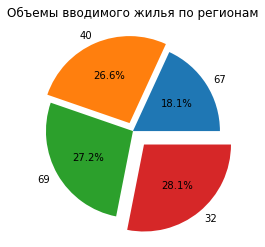

In [53]:
v = g['жилая площадь']
labels = g.index
explode = [0, 0.1, 0, 0.2]
plt.pie(v, labels=labels, explode=explode, autopct="%1.1f%%")
plt.title("Объемы вводимого жилья по регионам")
plt.show()

In [28]:
# Вывод: больше всего строят жилой площади в Брянской области

In [29]:
# посчитаем количество лет дома от сегодня до ввода в эксплуатацию ввод в эксплуатацию
today = datetime.combine(date.today(), datetime.min.time()) # сегодня
sktb['срок'] = sktb['ввод в эксплуатацию'].apply(lambda x: (x - today).days / 365)

In [117]:
# посчитаем средний срок до ввода домов в эксплуатацию по регионам
today = datetime.combine(date.today(), datetime.min.time()) # сегодня
g3 = sktb.groupby(['номер региона'])[['срок']].agg(['count', 'mean'])
g3

срок          
              count      mean
номер региона                
32               62  1.162086
40               73  0.691649
67               63  1.235095
69               84  0.951924

In [31]:
# Вывод: Быстрее всего строят в Калужской области

In [119]:
fig = px.bar(x=g3.index, y=g3['срок']['mean'])
fig.show()

In [104]:
fig = px.scatter(x=sktb['id дома'], y=sktb['ввод в эксплуатацию'])
fig.show()

In [32]:
# Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест
# и цену за квадратный метр в разных регионах
sktb.groupby(['номер региона'])[['количество этажей', 'жилая площадь','количество мест в паркинге',
                                'средняя цена за 1 м²']].mean()

,количество этажей,жилая площадь,количество мест в паркинге,средняя цена за 1 м²
номер региона,,,,
32,10.790323,7884.624677,1.161290,57713.739130
40,9.589041,6332.596986,10.000000,78270.966102
67,9.793651,5009.315556,4.904762,51771.250000
69,10.916667,5632.207500,6.726190,67183.745455


In [131]:
g4 = sktb.groupby(['номер региона'])[['количество этажей', 'жилая площадь','количество мест в паркинге',
                                'средняя цена за 1 м²']].agg(['min', 'max', 'mean', 'median'])
g4

количество этажей                         жилая площадь  \
                            min   max       mean median           min   
номер региона                                                           
32                          3.0  22.0  10.790323   11.0       1273.95   
40                          1.0  26.0   9.589041   10.0          0.00   
67                          3.0  17.0   9.793651   11.0        439.10   
69                          1.0  26.0  10.916667   10.5          0.00   

                                               количество мест в паркинге  \
                    max         mean    median                        min   
номер региона                                                               
32             41571.04  7884.624677  5769.585                          0   
40             29464.60  6332.596986  4441.900                          0   
67             21601.99  5009.315556  4342.020                          0   
69             33422.95  5632.207500  4177.555                          0   

                                     средняя цена за 1 м²            \
               max       mean median                  min       max   
номер региона                                                         
32              42   1.161290    0.0                  0.0   81096.0   
40             267  10.000000    0.0                  0.0  168944.0   
67              96   4.904762    0.0                  0.0   83941.0   
69             186   6.726190    0.0                  0.0  117410.0   

                                      
                       mean   median  
номер региона                         
32             42819.870968  51693.0  
40             63260.095890  68310.0  
67             46018.888889  50626.0  
69             43989.357143  47260.0

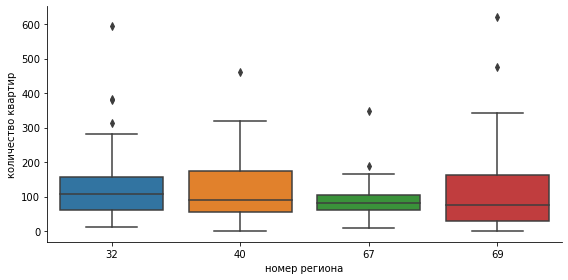

In [127]:
sns.catplot(
    x='номер региона', 
    y='количество квартир', 
    data=sktb, 
    kind='box', 
    height=4, 
    aspect=2
); 

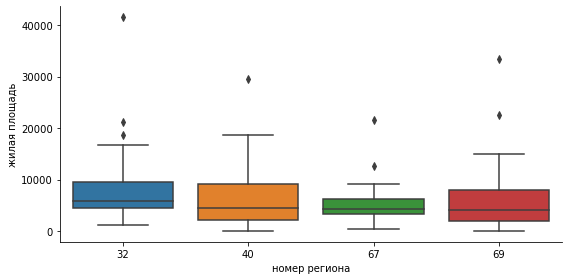

In [129]:
sns.catplot(
    x='номер региона', 
    y='жилая площадь', 
    data=sktb, 
    kind='box', 
    height=4, 
    aspect=2
); 

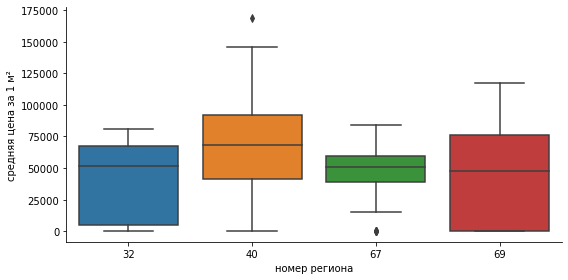

In [130]:
sns.catplot(
    x='номер региона', 
    y='средняя цена за 1 м²', 
    data=sktb, 
    kind='box', 
    height=4, 
    aspect=2
); 